# Project Analisa Klasifikasi Pinjaman untuk Sektor UMKM
<b>Describe</b><br>
Perusahaan Alembert merupakan perusahaan yang bergerak di bidang layanan pinjaman usaha bagi sektor UMKM. Karena adanya pandemik ini, perusahaan berusaha memberikan pelayanan berupa keringanan pinjaman bagi pelanggan yang disebut sebagai rekomendasi tindak lanjut. Pemberian rekomendasi tindak lanjut pada pelanggan ini didasari pada kriteria tertentu, dan perlu ditentukan faktor-faktor apa saja yang berpengaruh sehingga pelanggan mendapatkan treatment tertentu yang masuk dalam rekomendasi tindak lanjut program dari perusahaan.

<b>Tujuan Project:</b> Klasifikasi nasabah yang akan dimasukkan pada rekomendasi tindak lanjut. Pada kelas target rekomendasi tindak lanjut ini sendiri terdiri dari beberapa kelas seperti restrukturisasi dan angsuran biasa.

<b>Model:</b> Regresi multinomial.

<b>Referensi model (Ref):</b> Kelas pada rekomendasi tindak lanjut yang memiliki banyak pelanggan.

### Membaca data eksternal

In [2]:
# Get Dataset
data <- read.csv("https://storage.googleapis.com/dqlab-dataset/project.csv")

# Display the top 6 rows
head(data, 6)

,X,NAMA_NASABAH,NOMOR_KONTRAK,DOMISILI,KARAKTER,PROFESI,KONDISI_USAHA,KONDISI_JAMINAN,STATUS,PRODUK,PYD,TENOR,OSL,KEWAJIBAN,KOLEKTIBILITAS,COUNT_SURVEY,REKOMENDASI_TINDAK_LANJUT
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>
1,0,YOLI SEPINA NAINGGOLAN,0,MASIH TETAP,KOOPERATIF,IBU RUMAH TANGGA,2,Baik,2,3,30000000,24,28750000,4896841,DALAM PENGAWASAN KHUSUS,1,Angsuran Biasa
2,1,ERWIN NASUTION,1,MASIH TETAP,TIDAK KOOPERATIF,NELAYAN,3,Rusak,8,3,10000000,12,2040693,0,MACET,1,Penarikan
3,2,HUSIN,2,MASIH TETAP,TIDAK KOOPERATIF,LAINNYA,3,Baik,8,3,60000000,24,0,0,MACET,1,Penarikan
4,3,HARITSYAH,3,PINDAH PERMANEN,KOOPERATIF,PNS,1,Rusak,7,3,90000000,18,0,0,MACET,1,Angsuran Biasa
5,4,HARIRI PANGGABEAN,4,MASIH TETAP,TIDAK KOOPERATIF,WIRAUSAHA / PEDAGANG,1,Baik,8,3,150000000,18,19844807,0,MACET,1,Penarikan
6,5,JHON PREDDY HUTABARAT,5,MASIH TETAP,KOOPERATIF,WIRAUSAHA / PEDAGANG,1,Baik,7,3,40000000,36,27298726,2208516,DALAM PENGAWASAN KHUSUS,1,Restrukturisasi


In [3]:
# displays the data type of each column
str(data)

'data.frame':	1000 obs. of  17 variables:
 $ X                        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ NAMA_NASABAH             : chr  "YOLI SEPINA NAINGGOLAN" "ERWIN NASUTION" "HUSIN" "HARITSYAH" ...
 $ NOMOR_KONTRAK            : int  0 1 2 3 4 5 6 7 8 9 ...
 $ DOMISILI                 : chr  "MASIH TETAP" "MASIH TETAP" "MASIH TETAP" "PINDAH PERMANEN" ...
 $ KARAKTER                 : chr  "KOOPERATIF" "TIDAK KOOPERATIF" "TIDAK KOOPERATIF" "KOOPERATIF" ...
 $ PROFESI                  : chr  "IBU RUMAH TANGGA" "NELAYAN" "LAINNYA" "PNS" ...
 $ KONDISI_USAHA            : int  2 3 3 1 1 1 3 2 2 3 ...
 $ KONDISI_JAMINAN          : chr  "Baik" "Rusak" "Baik" "Rusak" ...
 $ STATUS                   : int  2 8 8 7 8 7 7 7 7 3 ...
 $ PRODUK                   : int  3 3 3 3 3 3 3 3 3 3 ...
 $ PYD                      : int  30000000 10000000 60000000 90000000 150000000 40000000 60000000 7500000 45000000 50000000 ...
 $ TENOR                    : int  24 12 24 18 18 36 36 4 24 36 ...
 $ OSL    

##### Statistik deskriptif data

In [4]:
# summary
summary(data)

       X         NAMA_NASABAH       NOMOR_KONTRAK     DOMISILI        
 Min.   :  0.0   Length:1000        Min.   :  0.0   Length:1000       
 1st Qu.:249.8   Class :character   1st Qu.:249.8   Class :character  
 Median :499.5   Mode  :character   Median :499.5   Mode  :character  
 Mean   :499.5                      Mean   :499.5                     
 3rd Qu.:749.2                      3rd Qu.:749.2                     
 Max.   :999.0                      Max.   :999.0                     
   KARAKTER           PROFESI          KONDISI_USAHA   KONDISI_JAMINAN   
 Length:1000        Length:1000        Min.   :1.000   Length:1000       
 Class :character   Class :character   1st Qu.:2.000   Class :character  
 Mode  :character   Mode  :character   Median :2.000   Mode  :character  
                                       Mean   :2.273                     
                                       3rd Qu.:3.000                     
                                       Max.   :3.000       

### Menghapus kolom
Pada data, sebenarnya tidak memerlukan NAMA_NASABAH untuk diberikan rekomendasi. Atau dengan kata lain penanda pelanggan untuk diberikan rekomendasi cukup dengan melihat no_kontrak pelanggan itu saja.

In [5]:
# Deleting columns
data_reduce = data[-c(1,2)]
colnames(data_reduce)

[1] "NOMOR_KONTRAK"             "DOMISILI"                 
 [3] "KARAKTER"                  "PROFESI"                  
 [5] "KONDISI_USAHA"             "KONDISI_JAMINAN"          
 [7] "STATUS"                    "PRODUK"                   
 [9] "PYD"                       "TENOR"                    
[11] "OSL"                       "KEWAJIBAN"                
[13] "KOLEKTIBILITAS"            "COUNT_SURVEY"             
[15] "REKOMENDASI_TINDAK_LANJUT"

### Konversi data
Seperti yang diketahui ketika data ditarik dari suatu sumber terkadang ada kondisi tipe data tidak dengan tepat direpresentasikan. Misalkan semua record/baris pada suatu kolom berisi seharusnya data numerik akan tetapi disajikan didalam suatu karakter angka.

R sendiri memiliki fungsi sapply yang dapat digunakan untuk mengkoversi tipe data. Dalam hal ini fungsi sapply menerima input/argumen fungsi berupa list, vector, atau data frame dan mengembalikan/menghasilkan output berupa vector atau matrix.

Cobalah untuk meninjau kembali kolom PRODUK, PYD, TENOR, dan OSL apakah perlu dikonversikan menjadi bertipe numerik atau tidak. Jika tidak perlu di konversi, tidak perlu diubah.

In [6]:
cek.1 <- data_reduce[, 8:11]
head(cek.1, 6)

,PRODUK,PYD,TENOR,OSL
,<int>,<int>,<int>,<int>
1,3,30000000,24,28750000
2,3,10000000,12,2040693
3,3,60000000,24,0
4,3,90000000,18,0
5,3,150000000,18,19844807
6,3,40000000,36,27298726


### Pemilihan data kategori
Tentu saja kamu menyadari bahwa data yang dimiliki ada yang bersifat kategorik. Data kategori dapat dipilih melalui kolom-kolom “KONDISI_USAHA”, “KONDISI_JAMINAN”, “REKOMENDASI_TINDAK_LANJUT”.

Kemudian ubah kolom “REKOMENDASI_TINDAK_LANJUT” sebagai faktor (menggunakkan as.factor).


In [7]:
# Select spesific columns from the DataFrame
data_kategorik = data_reduce[, c("KONDISI_USAHA", "KONDISI_JAMINAN", "REKOMENDASI_TINDAK_LANJUT")]

# Change the type data of column "REKOMENDASI_TINDAK_LANJUT"
data_reduce$REKOMENDASI_TINDAK_LANJUT = as.factor(data_reduce$REKOMENDASI_TINDAK_LANJUT)

In [8]:
str(data_reduce$REKOMENDASI_TINDAK_LANJUT)

 Factor w/ 4 levels "Angsuran Biasa",..: 1 3 3 1 3 4 4 4 4 1 ...



Gunakan uji chi-square dapat digunakan untuk melihat hubungan antar variabel kategorik berikut:

In [9]:
# View relationship between data variable
chisq.test(data_kategorik$KONDISI_USAHA, data_kategorik$REKOMENDASI_TINDAK_LANJUT)

Warning message in chisq.test(data_kategorik$KONDISI_USAHA, data_kategorik$REKOMENDASI_TINDAK_LANJUT):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  data_kategorik$KONDISI_USAHA and data_kategorik$REKOMENDASI_TINDAK_LANJUT
X-squared = 129.82, df = 6, p-value < 2.2e-16


In [10]:
# View relationship between KONDISI_JAMINAN and REKOMENDASI_TINDAK_LANJUT columns
chisq.test(data_kategorik$KONDISI_JAMINAN, data_kategorik$REKOMENDASI_TINDAK_LANJUT)

Warning message in chisq.test(data_kategorik$KONDISI_JAMINAN, data_kategorik$REKOMENDASI_TINDAK_LANJUT):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  data_kategorik$KONDISI_JAMINAN and data_kategorik$REKOMENDASI_TINDAK_LANJUT
X-squared = 162.87, df = 9, p-value < 2.2e-16


Berdasarkan hasil temuan dari uji chi-square diatas dapat disimpulkan bahwa variabel kondisi usaha memiliki hubungan dengan variabel rekomendasi tindak lanjut karena p-value < 0,05(5%). Kondisi jaminan juga memiliki hubungan dengan variabel rekomendasi tindak lanjut karena p-value < 0,05(5%).

### Korelasi antar variabel data
Selain melihat hubungan pada data yang bersifat kategorikal, kita juga bisa melihat hubungan antar variabel numerikal. Ya. Kita akan menggunakan korelasi.

In [12]:
install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



corrplot 0.92 loaded



[1] "PRODUK" "PYD"    "TENOR"  "OSL"

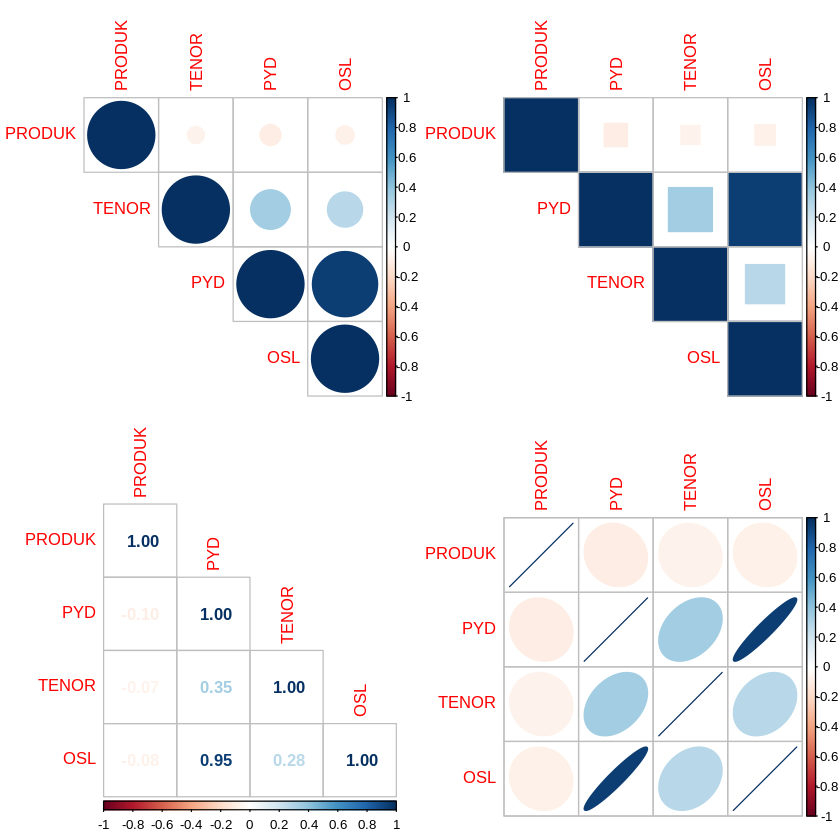

In [13]:
library(corrplot)

M = data_reduce[,8:11]
colnames(M)

# Pearson Correlation
par(mfrow=c(2,2))
corrplot(cor(M), type = "upper", order = "hclust")
corrplot(cor(M), method = "square", type = "upper")
corrplot(cor(M), method = "number", type = "lower")
corrplot(cor(M), method = "ellipse")

In [14]:
install.packages('ggcorrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’




Loading required package: ggplot2



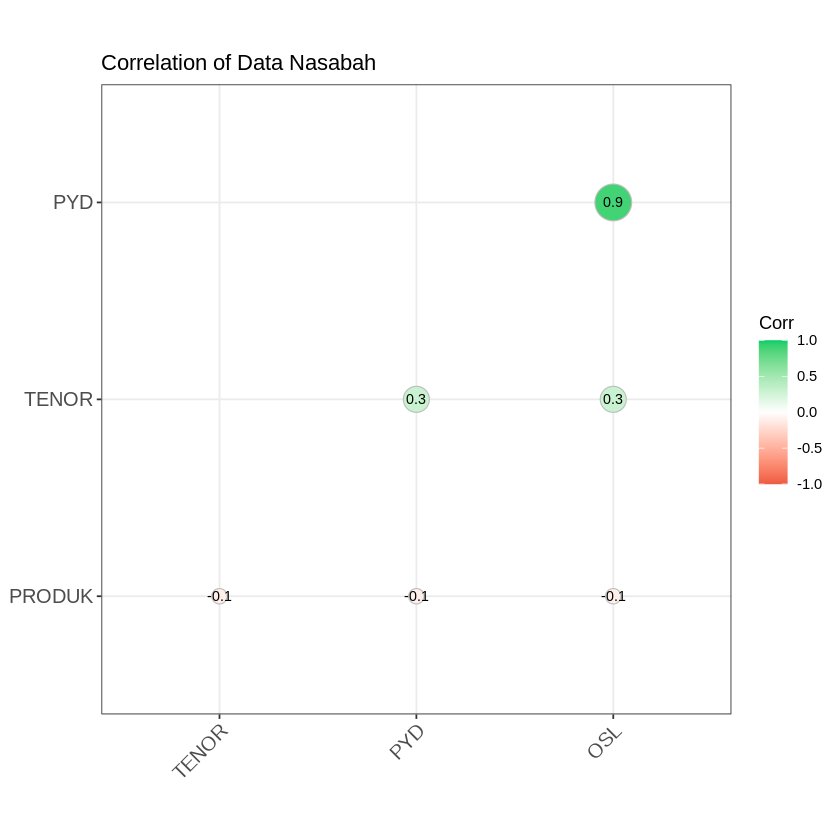

In [15]:
library(ggcorrplot)

corr <- round(cor(M), 1) # Pearson Correlation
ggcorrplot(round(cor(M), 1),
  hc.order = TRUE,
  type = "lower",
  lab = TRUE,
  lab_size = 3,
  method = "circle",
  colors= c("tomato2", "white", "springgreen3"),
  title = "Correlation of Data Nasabah",
  ggtheme = theme_bw)

melihat korelasi adalah dengan metode korelasi pearson dan korelasi kendall. Jika nilai korelasinya bernilai positif maka korelasi antar variabel tersebut berkorelasi kuat.

## Pemilihan Variable


### Pemilihan fitur/independent variabel/input
Dalam melakukan pemodelan tentu kita perlu meninjau variabel-variabel apa saja yang berpengaruh pada model kita, khususnya pada klasifikasi. Pada kesempatan ini kita menggunakan model Regresi Multinomial.

Lalu bagaimana menentukan variabel apa saja yang berpengaruh tersebut?

Ada banyak alternatif, salah satunya ialah Information Gain. Melalui information gain diambil nilai importance variabel yang lebih dari 0.02 (kamu dapat eksplorasi apa yang terjadi apabila kita mengambil nilai yang kurang dari 0.02).
Berikut information gainnya:
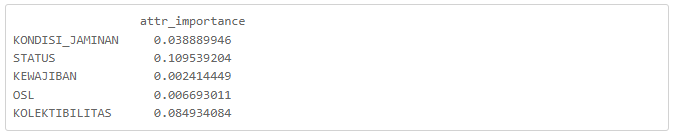

In [16]:
# Choosing independent Variable
colnames(data_reduce)

[1] "NOMOR_KONTRAK"             "DOMISILI"                 
 [3] "KARAKTER"                  "PROFESI"                  
 [5] "KONDISI_USAHA"             "KONDISI_JAMINAN"          
 [7] "STATUS"                    "PRODUK"                   
 [9] "PYD"                       "TENOR"                    
[11] "OSL"                       "KEWAJIBAN"                
[13] "KOLEKTIBILITAS"            "COUNT_SURVEY"             
[15] "REKOMENDASI_TINDAK_LANJUT"

In [17]:
# Select column
data_select = data_reduce[, c("KARAKTER","KONDISI_USAHA","KONDISI_JAMINAN","STATUS","KEWAJIBAN","OSL","KOLEKTIBILITAS","REKOMENDASI_TINDAK_LANJUT")]

# Delete column that have NA values
data_non_na = na.omit(data_select)
head(data_non_na, 6)

,KARAKTER,KONDISI_USAHA,KONDISI_JAMINAN,STATUS,KEWAJIBAN,OSL,KOLEKTIBILITAS,REKOMENDASI_TINDAK_LANJUT
,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<fct>
1,KOOPERATIF,2,Baik,2,4896841,28750000,DALAM PENGAWASAN KHUSUS,Angsuran Biasa
2,TIDAK KOOPERATIF,3,Rusak,8,0,2040693,MACET,Penarikan
3,TIDAK KOOPERATIF,3,Baik,8,0,0,MACET,Penarikan
4,KOOPERATIF,1,Rusak,7,0,0,MACET,Angsuran Biasa
5,TIDAK KOOPERATIF,1,Baik,8,0,19844807,MACET,Penarikan
6,KOOPERATIF,1,Baik,7,2208516,27298726,DALAM PENGAWASAN KHUSUS,Restrukturisasi


### Transformasi data
Untuk memberikan performa model yang baik, maka pada data kita perlu dilakukan ***treatment*** tertentu, misalnya dilakukan ***scalling*** atau dilakukan pengelompokan data atau disebut juga ***bucketing***.

In [18]:
data_select_new = data_select
data_select_new$KEWAJIBAN = scale(data_select_new$KEWAJIBAN) [, 1]
data_select_new$OSL = scale(data_select_new$OSL) [, 1]
data_select_new$KEWAJIBAN = cut(data_select_new$KEWAJIBAN, breaks = c(-0.354107,5,15,30))
data_select_new$KEWAJIBAN = as.factor(data_select_new$KEWAJIBAN)
data_select_new$OSL = cut(data_select_new$OSL, breaks = c(-0.354107,5,15,30))
data_select_new$OSL = as.factor(data_select_new$OSL)
data_select_new = na.omit(data_select_new)
data_select_new

,KARAKTER,KONDISI_USAHA,KONDISI_JAMINAN,STATUS,KEWAJIBAN,OSL,KOLEKTIBILITAS,REKOMENDASI_TINDAK_LANJUT
,<chr>,<int>,<chr>,<int>,<fct>,<fct>,<chr>,<fct>
1,KOOPERATIF,2,Baik,2,"(-0.354,5]","(-0.354,5]",DALAM PENGAWASAN KHUSUS,Angsuran Biasa
5,TIDAK KOOPERATIF,1,Baik,8,"(-0.354,5]","(-0.354,5]",MACET,Penarikan
6,KOOPERATIF,1,Baik,7,"(-0.354,5]","(-0.354,5]",DALAM PENGAWASAN KHUSUS,Restrukturisasi
7,KOOPERATIF,3,Baik,7,"(-0.354,5]","(-0.354,5]",DALAM PENGAWASAN KHUSUS,Restrukturisasi
9,KOOPERATIF,2,Baik,7,"(-0.354,5]","(-0.354,5]",LANCAR,Restrukturisasi
11,KOOPERATIF,3,Baik,7,"(-0.354,5]","(-0.354,5]",DALAM PENGAWASAN KHUSUS,Restrukturisasi
15,TIDAK KOOPERATIF,1,Baik,3,"(-0.354,5]","(-0.354,5]",DALAM PENGAWASAN KHUSUS,Angsuran Biasa
18,KOOPERATIF,1,Baik,7,"(-0.354,5]","(-0.354,5]",DALAM PENGAWASAN KHUSUS,Diskon Pelunasan
19,KOOPERATIF,3,Baik,2,"(-0.354,5]","(-0.354,5]",DALAM PENGAWASAN KHUSUS,Restrukturisasi


### Training data
Sebelum masuk pada pemodelan, kita perlu memisahkan data kita menjadi training dan testing (ada pula yang membaginya menjadi training, testing, dan validasi).

Tujuan dari pemisahan data ini ialah untuk melihat kemampuan model kita untuk melakukan prediksi sebagaimana tujuan dari pemodelan kita.

In [19]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’




In [20]:
install.packages('lattice')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
library(caret)

# Create an index to split dataset with a proportion of 95% training data and 5% test data
index = createDataPartition(data_select_new$REKOMENDASI_TINDAK_LANJUT, p= .95, list = FALSE)

# Selecting rows that match the index for the training data.
train = data_select_new[index, ]

# Selecting rows that do not match the index for the test data.
test = data_select_new[-index, ]

# Display the dimensions of the training dataset
dim(train)

Loading required package: lattice



[1] 437   8

In [22]:
# Display the dimensions of the training dataset
dim(test)

[1] 20  8

### Pemodelan/Modelling data
Sekarang kita siap untuk masuk pada pemodelan.

In [23]:
train2 = train

# Setting the reference
train2$REKOMENDASI_TINDAK_LANJUT = relevel(train$REKOMENDASI_TINDAK_LANJUT, ref = "Angsuran Biasa")

# Training model
require(nnet)

Loading required package: nnet



In [24]:
# Training the multinomial model
multinom_model = multinom(REKOMENDASI_TINDAK_LANJUT ~ ., data=train2)

# weights:  64 (45 variable)
initial  value 605.810636 
iter  10 value 297.757924
iter  20 value 264.894804
iter  30 value 263.870970
iter  40 value 263.799881
final  value 263.799477 
converged


In [25]:
# checking model
summary(multinom_model)

Warning message in sqrt(diag(vc)):
“NaNs produced”


Call:
multinom(formula = REKOMENDASI_TINDAK_LANJUT ~ ., data = train2)

Coefficients:
                 (Intercept) KARAKTERTIDAK KOOPERATIF KONDISI_USAHA
Diskon Pelunasan   11.244759                -14.62624    -13.852918
Penarikan         -57.307161                 48.65765      1.623541
Restrukturisasi    -3.537153                -56.28708      1.068860
                 KONDISI_JAMINANHilang KONDISI_JAMINANPindah Tangan
Diskon Pelunasan             -1.526697                    0.6409944
Penarikan                   175.539677                   -0.9872966
Restrukturisasi             -27.468739                  -48.5727355
                 KONDISI_JAMINANRusak     STATUS KEWAJIBAN(5,15]
Diskon Pelunasan             1.360318 0.04943448               0
Penarikan                   10.588672 0.45204514               0
Restrukturisasi             -1.143673 0.26073683               0
                 KEWAJIBAN(15,30]  OSL(5,15] OSL(15,30] KOLEKTIBILITASDIRAGUKAN
Diskon Pelunasan        -2.170

In [26]:
# converting the coefficients to odds by taking the exponential of the coefficients
exp(coef(multinom_model))

,(Intercept),KARAKTERTIDAK KOOPERATIF,KONDISI_USAHA,KONDISI_JAMINANHilang,KONDISI_JAMINANPindah Tangan,KONDISI_JAMINANRusak,STATUS,"KEWAJIBAN(5,15]","KEWAJIBAN(15,30]","OSL(5,15]","OSL(15,30]",KOLEKTIBILITASDIRAGUKAN,KOLEKTIBILITASKURANG LANCAR,KOLEKTIBILITASLANCAR,KOLEKTIBILITASMACET
Diskon Pelunasan,7.647808e+04,4.445317e-07,9.632836e-07,2.172521e-01,1.898368e+00,3.897433e+00,1.050677,1,1.140674e-01,33.527387,1,8.839828e+00,2.166028e-07,1.043220e+00,2.226650e+00
Penarikan,1.293649e-25,1.354404e+21,5.071016e+00,1.721523e+76,3.725826e-01,3.968275e+04,1.571523,1,1.866968e+02,92807.767215,1,1.574102e+22,8.810220e+20,1.245797e-06,6.389174e+12
Restrukturisasi,2.909605e-02,3.587822e-25,2.912057e+00,1.176192e-12,8.037648e-22,3.186465e-01,1.297886,1,1.657226e+14,1.323329,1,1.431847e+00,1.256454e+00,1.335302e+00,3.391401e-19


In [27]:
head(round(fitted(multinom_model), 2))

,Angsuran Biasa,Diskon Pelunasan,Penarikan,Restrukturisasi
1,0.71,0.00,0,0.29
5,0.00,0.00,1,0.00
6,0.61,0.06,0,0.32
7,0.18,0.00,0,0.82
9,0.33,0.00,0,0.67
11,0.18,0.00,0,0.82


In [28]:
# predicting the values for train dataset
train2$ClassPredicted = predict(multinom_model, newdata = train2, "class")
train_prob = predict(multinom_model, newdata = train2, "probs")
df = train_prob
df$max = apply(df,1,max)

Warning message in df$max = apply(df, 1, max):
“Coercing LHS to a list”


In [29]:
train2$score = df$max
test_prob = predict(multinom_model, newdata = test, "probs")
df2 = test_prob
df2$max = apply(df2,1,max)

Warning message in df2$max = apply(df2, 1, max):
“Coercing LHS to a list”


Untuk keperluan tertentu, kita perlu mengetahui peluang dari tiap baris data (perwakilan dari pelanggan) untuk masuk pada kelas target tertentu.

Tujuannya ialah untuk melihat seberapa pengaruh model untuk melakukan klasifikasi. Selain itu bisa juga dari sudut pandang bisnis, dalam kasus ***real*** penentuan ***threshold*** pada nilai peluang juga dikaitkan dengan beberapa faktor, misalnya ***revenue*** pelanggan.

Cobalah lihat nilai peluang bahwa suatu pelanggan masuk pada kelas target tertentu !

In [30]:
# Building classification table
tab_train = table(train2$REKOMENDASI_TINDAK_LANJUT, train2$ClassPredicted)
round((sum(diag(tab_train))/sum(tab_train))*100,4)

[1] 68.6499

In [31]:
test$ClassPredicted = predict(multinom_model, newdata = test, "class")
test$score = df2$max
tab_test = table(test$REKOMENDASI_TINDAK_LANJUT, test$ClassPredicted)
round((sum(diag(tab_test))/sum(tab_test))*100,4)

[1] 70